Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS200.M21

PySpark - 28/04/2022

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Ld3wcEp0zwZjFV3pLl6pe7i2FGxETeq2?usp=sharing)

# **Big Data - Spark ML**

## Spark Machine Learning

### Spark Mllib Utilities

#### Linear Algebra

In [1]:
!pip install pyspark==3.0.1

     |████████████████████████████████| 204.2 MB 32 kB/s 
     |████████████████████████████████| 198 kB 40.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=d7d4206c047e5a5643bc6a851abe1d8410c030c3c17132fa893c56f9e41a5b4f
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
import numpy as np
import scipy.sparse as sps
from pyspark.ml.linalg import Vectors

##### Sparse Vector Example

In [4]:
# Use a Numpy array as a dense vector
dv1 = np.array([1.0, 0.0, 3.0])
print(dv1)

[1. 0. 3.]


In [5]:
# Create a SparseVector
sv1 = Vectors.sparse(3, [0, 2], [1.0, 3.0])
print(sv1)

(3,[0,2],[1.0,3.0])


##### Dense Vector Example

In [6]:
# Use a Python list as a densen vector
dv2 = [1.0, 0.0, 3.0]
print(dv2)

[1.0, 0.0, 3.0]


In [7]:
# Use a single-column Scipy csc_matrix as a sparse vector
sv2 = sps.csc_matrix((np.array([1.0, 3.0]), np.array([0, 2]), np.array([0, 2])), shape=(3, 1))
print(sv2)

  (0, 0)	1.0
  (2, 0)	3.0


##### Dense Matrix

In [8]:
from pyspark.ml.linalg import Matrix, Matrices

# Create a dense matrix ((1.0, 2.0), (3.0, 4.0), (5.0, 6.0))
dm = Matrices.dense(3, 2, [1, 3, 5, 2, 4, 6])
print(dm)

DenseMatrix([[1., 2.],
             [3., 4.],
             [5., 6.]])


##### Sparse Matrix

In [9]:
# Create a sparse matrix ((9.0, 0.0), (0.0, 8.0), (0.0, 6.0))
sm = Matrices.sparse(3, 2, [0, 1, 3], [0, 2, 1], [9, 6, 8])
print(sm)

3 X 2 CSCMatrix
(0,0) 9.0
(2,1) 6.0
(1,1) 8.0


#### Data Sources

In [10]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [11]:
!git clone https://github.com/apache/spark.git

Cloning into 'spark'...
remote: Enumerating objects: 904746, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 904746 (delta 48), reused 66 (delta 25), pack-reused 904610
Receiving objects: 100% (904746/904746), 409.69 MiB | 14.52 MiB/s, done.
Resolving deltas: 100% (395550/395550), done.
Checking out files: 100% (18432/18432), done.


In [12]:
PATH = '/content/spark/data/mllib/images/origin/kittens'

df = spark.read.format('image').option('dropInvalid', True).load(PATH).select('image.origin',
                                                                              'image.height',
                                                                              'image.width',
                                                                              'image.nChannels',
                                                                              'image.mode',
                                                                              'image.data')
df.toPandas()

,origin,height,width,nChannels,mode,data
0,file:///content/spark/data/mllib/images/origin...,311,300,3,16,"[193, 193, 193, 194, 194, 194, 194, 194, 194, ..."
1,file:///content/spark/data/mllib/images/origin...,313,199,3,16,"[208, 229, 237, 202, 223, 231, 210, 231, 239, ..."
2,file:///content/spark/data/mllib/images/origin...,200,300,3,16,"[88, 93, 96, 88, 93, 96, 88, 93, 96, 89, 94, 9..."
3,file:///content/spark/data/mllib/images/origin...,296,300,3,16,"[203, 230, 244, 202, 229, 243, 201, 228, 242, ..."


In [13]:
df.printSchema()

root
 |-- origin: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- width: integer (nullable = true)
 |-- nChannels: integer (nullable = true)
 |-- mode: integer (nullable = true)
 |-- data: binary (nullable = true)



### Spark MLlib Pipelines

5 Key Concepts: 
- DataFrame
- Estimator
```python
# A Transformer is an abstraction that includes feature tranformers and learned models.
# Technically, a transformer implements a method .transformer(), which converts on DataFrame 
# into another, generally by appending one or more columns.
model_out = Estimator.fit(df_in)
```
- Transformer
```python
# An astimator abstracts the concept of a learning algorithm or any algorithm that fits or trains on data.
# Technically, an Estimator implements a method .fit(), which accepts a DataFrame 
# and produces a model which is a transformer.
df_out = Transformer.tranform(df_in)
```
- Parameters
- Pipeline
  + Pipelines consist of a sequence of stages that run in order.
  + Each stage is either a transformer or an estimator.

#### Classification and regression

In [14]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [15]:
# Load and parse the data file, converting it to a DataFrame.
sample_libsvm_data = spark.read.format('libsvm').load('/content/spark/data/mllib/sample_libsvm_data.txt')
sample_libsvm_data.printSchema()
sample_libsvm_data.show()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



#### DecisionTreeClassifier

In [16]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

##### Feature Transformers

In [17]:
label_indexer = StringIndexer(inputCol='label', 
                              outputCol='indexedLabel').fit(sample_libsvm_data)
print(type(label_indexer))
label_indexer.transform(sample_libsvm_data).show()

<class 'pyspark.ml.feature.StringIndexerModel'>
+-----+--------------------+------------+
|label|            features|indexedLabel|
+-----+--------------------+------------+
|  0.0|(692,[127,128,129...|         1.0|
|  1.0|(692,[158,159,160...|         0.0|
|  1.0|(692,[124,125,126...|         0.0|
|  1.0|(692,[152,153,154...|         0.0|
|  1.0|(692,[151,152,153...|         0.0|
|  0.0|(692,[129,130,131...|         1.0|
|  1.0|(692,[158,159,160...|         0.0|
|  1.0|(692,[99,100,101,...|         0.0|
|  0.0|(692,[154,155,156...|         1.0|
|  0.0|(692,[127,128,129...|         1.0|
|  1.0|(692,[154,155,156...|         0.0|
|  0.0|(692,[153,154,155...|         1.0|
|  0.0|(692,[151,152,153...|         1.0|
|  1.0|(692,[129,130,131...|         0.0|
|  0.0|(692,[154,155,156...|         1.0|
|  1.0|(692,[150,151,152...|         0.0|
|  0.0|(692,[124,125,126...|         1.0|
|  0.0|(692,[152,153,154...|         1.0|
|  1.0|(692,[97,98,99,12...|         0.0|
|  1.0|(692,[124,125,126...|

In [18]:
# Automatically identify categorical features, and index them.
# We specify maxCategories so feature with > 4 distinct values are treated as continuous.
feature_indexer = VectorIndexer(inputCol='features',
                                outputCol='indexedFeatures',
                                maxCategories=4).fit(sample_libsvm_data)

feature_indexer.transform(sample_libsvm_data).show(truncate=40)

+-----+----------------------------------------+----------------------------------------+
|label|                                features|                         indexedFeatures|
+-----+----------------------------------------+----------------------------------------+
|  0.0|(692,[127,128,129,130,131,154,155,156...|(692,[127,128,129,130,131,154,155,156...|
|  1.0|(692,[158,159,160,161,185,186,187,188...|(692,[158,159,160,161,185,186,187,188...|
|  1.0|(692,[124,125,126,127,151,152,153,154...|(692,[124,125,126,127,151,152,153,154...|
|  1.0|(692,[152,153,154,180,181,182,183,208...|(692,[152,153,154,180,181,182,183,208...|
|  1.0|(692,[151,152,153,154,179,180,181,182...|(692,[151,152,153,154,179,180,181,182...|
|  0.0|(692,[129,130,131,132,156,157,158,159...|(692,[129,130,131,132,156,157,158,159...|
|  1.0|(692,[158,159,160,185,186,187,188,189...|(692,[158,159,160,185,186,187,188,189...|
|  1.0|(692,[99,100,101,127,128,129,130,154,...|(692,[99,100,101,127,128,129,130,154,...|
|  0.0|(69

##### Creating our stage

In [19]:
# STAGE 1:
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.

label_indexer = StringIndexer(inputCol='label',
                              outputCol='indexedLabel').fit(sample_libsvm_data)
label_indexer.transform(sample_libsvm_data).show()

+-----+--------------------+------------+
|label|            features|indexedLabel|
+-----+--------------------+------------+
|  0.0|(692,[127,128,129...|         1.0|
|  1.0|(692,[158,159,160...|         0.0|
|  1.0|(692,[124,125,126...|         0.0|
|  1.0|(692,[152,153,154...|         0.0|
|  1.0|(692,[151,152,153...|         0.0|
|  0.0|(692,[129,130,131...|         1.0|
|  1.0|(692,[158,159,160...|         0.0|
|  1.0|(692,[99,100,101,...|         0.0|
|  0.0|(692,[154,155,156...|         1.0|
|  0.0|(692,[127,128,129...|         1.0|
|  1.0|(692,[154,155,156...|         0.0|
|  0.0|(692,[153,154,155...|         1.0|
|  0.0|(692,[151,152,153...|         1.0|
|  1.0|(692,[129,130,131...|         0.0|
|  0.0|(692,[154,155,156...|         1.0|
|  1.0|(692,[150,151,152...|         0.0|
|  0.0|(692,[124,125,126...|         1.0|
|  0.0|(692,[152,153,154...|         1.0|
|  1.0|(692,[97,98,99,12...|         0.0|
|  1.0|(692,[124,125,126...|         0.0|
+-----+--------------------+------

In [20]:
# STAGE 2:
# Automatically identify categorical features, and index them.
# We specify maxCategories so feature with > 4 distinct values are treated as continuous.

feature_indexer = VectorIndexer(inputCol='features',
                                outputCol='indexedFeatures',
                                maxCategories=4).fit(sample_libsvm_data)

feature_indexer.transform(sample_libsvm_data).show(truncate=40)

+-----+----------------------------------------+----------------------------------------+
|label|                                features|                         indexedFeatures|
+-----+----------------------------------------+----------------------------------------+
|  0.0|(692,[127,128,129,130,131,154,155,156...|(692,[127,128,129,130,131,154,155,156...|
|  1.0|(692,[158,159,160,161,185,186,187,188...|(692,[158,159,160,161,185,186,187,188...|
|  1.0|(692,[124,125,126,127,151,152,153,154...|(692,[124,125,126,127,151,152,153,154...|
|  1.0|(692,[152,153,154,180,181,182,183,208...|(692,[152,153,154,180,181,182,183,208...|
|  1.0|(692,[151,152,153,154,179,180,181,182...|(692,[151,152,153,154,179,180,181,182...|
|  0.0|(692,[129,130,131,132,156,157,158,159...|(692,[129,130,131,132,156,157,158,159...|
|  1.0|(692,[158,159,160,185,186,187,188,189...|(692,[158,159,160,185,186,187,188,189...|
|  1.0|(692,[99,100,101,127,128,129,130,154,...|(692,[99,100,101,127,128,129,130,154,...|
|  0.0|(69

In [21]:
# STAGE 3:
# Train a DecisionTree model.

DTC_model = DecisionTreeClassifier(labelCol='indexedLabel', 
                                   featuresCol='indexedFeatures')
print(type(DTC_model))

<class 'pyspark.ml.classification.DecisionTreeClassifier'>


##### Creating our Pipeline

In [22]:
# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[label_indexer, # STAGE 1
                            feature_indexer, # STAGE 2
                            DTC_model, # STAGE 3
                            ])

##### Training model

In [23]:
# Split the data into training and test sets (30% held out for testing)
(training_data, test_data) = sample_libsvm_data.randomSplit([0.7, 0.3])

In [24]:
# Train model. This also runs the indexers.
model = pipeline.fit(training_data)

##### Prediction

In [25]:
# Makes predictions.
predictions = model.transform(test_data)
predictions.show()

+-----+--------------------+------------+--------------------+-------------+-----------+----------+
|label|            features|indexedLabel|     indexedFeatures|rawPrediction|probability|prediction|
+-----+--------------------+------------+--------------------+-------------+-----------+----------+
|  0.0|(692,[95,96,97,12...|         1.0|(692,[95,96,97,12...|   [0.0,32.0]|  [0.0,1.0]|       1.0|
|  0.0|(692,[98,99,100,1...|         1.0|(692,[98,99,100,1...|   [0.0,32.0]|  [0.0,1.0]|       1.0|
|  0.0|(692,[122,123,148...|         1.0|(692,[122,123,148...|   [0.0,32.0]|  [0.0,1.0]|       1.0|
|  0.0|(692,[124,125,126...|         1.0|(692,[124,125,126...|   [0.0,32.0]|  [0.0,1.0]|       1.0|
|  0.0|(692,[124,125,126...|         1.0|(692,[124,125,126...|   [0.0,32.0]|  [0.0,1.0]|       1.0|
|  0.0|(692,[125,126,127...|         1.0|(692,[125,126,127...|   [0.0,32.0]|  [0.0,1.0]|       1.0|
|  0.0|(692,[126,127,128...|         1.0|(692,[126,127,128...|   [0.0,32.0]|  [0.0,1.0]|       1.0|


In [26]:
# Select example rows to display.
predictions.select('prediction', 'indexedLabel', 'features').show()

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[95,96,97,12...|
|       1.0|         1.0|(692,[98,99,100,1...|
|       1.0|         1.0|(692,[122,123,148...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[125,126,127...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[127,128,129...|
|       1.0|         1.0|(692,[152,153,154...|
|       1.0|         1.0|(692,[153,154,155...|
|       1.0|         1.0|(692,[154,155,156...|
|       0.0|         0.0|(692,[100,101,102...|
|       0.0|         0.0|(692,[119,120,121...|
|       0.0|         0.0|(692,[123,124,125...|
|       0.0|         0.0|(692,[124,125,126...|
|       0.0|         0.0|(692,[124,125,126...|
|       0.0|         0.0|(692,[125,126,127...|
|       0.0|         0.0|(692,[126,127,128...|
|       0.0| 

In [27]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol='indexedLabel',
                                              predictionCol='prediction',
                                              metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f'Accuracy = {accuracy:.5f}')
print(f'Test Error = {1.0 - accuracy:.5f}')

Accuracy = 1.00000
Test Error = 0.00000


In [28]:
# You can see that the Pipeline and the PipelineModel have same stages
print(pipeline.getStages())
print(model.stages)

[StringIndexerModel: uid=StringIndexer_9705cbb4c739, handleInvalid=error, VectorIndexerModel: uid=VectorIndexer_dacff6966f69, numFeatures=692, handleInvalid=error, DecisionTreeClassifier_fd72ff399c02]
[StringIndexerModel: uid=StringIndexer_9705cbb4c739, handleInvalid=error, VectorIndexerModel: uid=VectorIndexer_dacff6966f69, numFeatures=692, handleInvalid=error, DecisionTreeClassificationModel: uid=DecisionTreeClassifier_fd72ff399c02, depth=2, numNodes=5, numClasses=2, numFeatures=692]


#### Random Forest Regression

In [29]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

sample_libsvm_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



##### Creating our stages

In [30]:
# STAGE 1:
# Automatically identify categorical features, and index them.
feature_indexer = VectorIndexer(inputCol='features',
                                outputCol='indexedFeatures',
                                # Set maxCategories so features with > 4 distinct values are treated as continuous. 
                                maxCategories=4,).fit(sample_libsvm_data)

In [31]:
# STAGE 2:
# Train a RandomForest model.
RF_model = RandomForestRegressor(featuresCol='indexedFeatures')

##### Creating our Pipeline

In [32]:
# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[feature_indexer, RF_model])

##### Training model

In [33]:
# Split the data into training and test sets (30% held out for testing)
(training_data, test_data) = sample_libsvm_data.randomSplit([0.7, 0.3])

In [34]:
# Train model. This also runs the indexers.
model = pipeline.fit(training_data)

##### Prediction

In [35]:
# Makes predictions.
predictions = model.transform(test_data)
predictions.show()

+-----+--------------------+--------------------+----------+
|label|            features|     indexedFeatures|prediction|
+-----+--------------------+--------------------+----------+
|  0.0|(692,[95,96,97,12...|(692,[95,96,97,12...|       0.0|
|  0.0|(692,[98,99,100,1...|(692,[98,99,100,1...|       0.0|
|  0.0|(692,[121,122,123...|(692,[121,122,123...|       0.0|
|  0.0|(692,[123,124,125...|(692,[123,124,125...|       0.0|
|  0.0|(692,[123,124,125...|(692,[123,124,125...|       0.0|
|  0.0|(692,[124,125,126...|(692,[124,125,126...|       0.0|
|  0.0|(692,[124,125,126...|(692,[124,125,126...|       0.0|
|  0.0|(692,[126,127,128...|(692,[126,127,128...|       0.0|
|  0.0|(692,[126,127,128...|(692,[126,127,128...|       0.0|
|  0.0|(692,[126,127,128...|(692,[126,127,128...|       0.0|
|  0.0|(692,[150,151,152...|(692,[150,151,152...|       0.1|
|  0.0|(692,[152,153,154...|(692,[152,153,154...|       0.1|
|  0.0|(692,[153,154,155...|(692,[153,154,155...|       0.0|
|  0.0|(692,[154,155,156

In [36]:
# Select example rows to display.
predictions.select('prediction', 'label', 'features').show()

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(692,[95,96,97,12...|
|       0.0|  0.0|(692,[98,99,100,1...|
|       0.0|  0.0|(692,[121,122,123...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[126,127,128...|
|       0.0|  0.0|(692,[126,127,128...|
|       0.0|  0.0|(692,[126,127,128...|
|       0.1|  0.0|(692,[150,151,152...|
|       0.1|  0.0|(692,[152,153,154...|
|       0.0|  0.0|(692,[153,154,155...|
|       0.2|  0.0|(692,[154,155,156...|
|       0.0|  0.0|(692,[155,156,180...|
|       0.1|  0.0|(692,[234,235,237...|
|       1.0|  1.0|(692,[100,101,102...|
|       1.0|  1.0|(692,[124,125,126...|
|       1.0|  1.0|(692,[124,125,126...|
|       1.0|  1.0|(692,[126,127,128...|
+----------+-----+--------------------+
only showing top 20 rows



In [37]:
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(labelCol='label',
                                predictionCol='prediction',
                                metricName='rmse')
RMSE = evaluator.evaluate(predictions)

print(f'Root Mean Squared Error (RMSE) on test data = {RMSE:.5f}')

Root Mean Squared Error (RMSE) on test data = 0.05159


In [38]:
# You can see that the Pipeline and the PipelineModel have same stages
print(pipeline.getStages())
print(model.stages)

[VectorIndexerModel: uid=VectorIndexer_29fc8b0186e1, numFeatures=692, handleInvalid=error, RandomForestRegressor_1d8a172b8eac]
[VectorIndexerModel: uid=VectorIndexer_29fc8b0186e1, numFeatures=692, handleInvalid=error, RandomForestRegressionModel: uid=RandomForestRegressor_1d8a172b8eac, numTrees=20, numFeatures=692]


In [39]:
# The last stage in a PipelineModel is usually the most informative 
print(model.stages[-1])

RandomForestRegressionModel: uid=RandomForestRegressor_1d8a172b8eac, numTrees=20, numFeatures=692


In [40]:
# Here you can see that pipeline and model are PipelineModel classes
print('pipeline: ', type(pipeline))
print('model:', type(model))

pipeline:  <class 'pyspark.ml.pipeline.Pipeline'>
model: <class 'pyspark.ml.pipeline.PipelineModel'>


### Spark MLlib Persistence

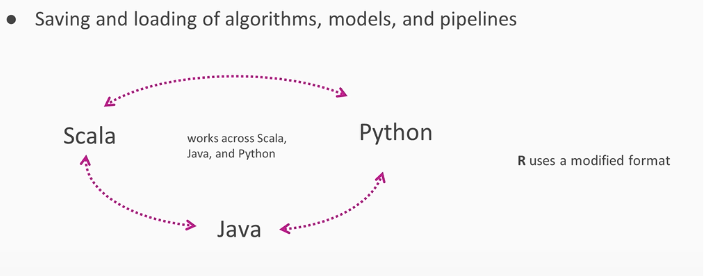

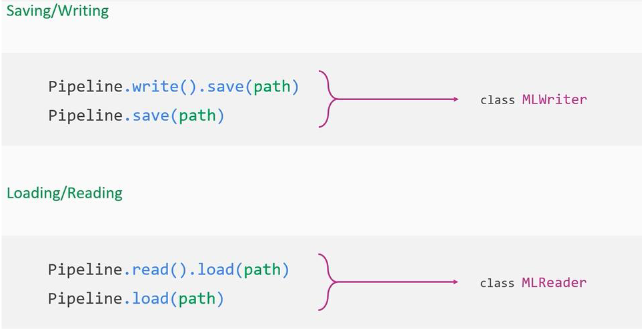

### Spark MLlib Parameters

- Param: A named paremeter with self-contained documentation
```
.extractParams()
```
- ParamMap: a set of (parameter, value) pairs
```
.extractParamMap()
```


In [41]:
from IPython.core.display import display, HTML
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression

spark = SparkSession.builder.getOrCreate()

In [42]:
# Prepare training data from a list of (label, features) tuples.
training = spark.createDataFrame([(1.0, Vectors.dense([0.0, 1.1, 0.1])),
                                  (0.0, Vectors.dense([2.0, 1.0, -1.0])),
                                  (0.0, Vectors.dense([2.0, 1.3, 1.0])),
                                  (1.0, Vectors.dense([0.0, 1.2, -0.5]))],
                                 ['label', 'features'])

In [43]:
# Prepare test data 
test = spark.createDataFrame([(1.0, Vectors.dense([-1.0, 1.5, 1.3])),
                              (0.0, Vectors.dense([3.0, 2.0, -0.1])),
                              (1.0, Vectors.dense([0.0, 2.2, -1.5]))],
                             ['label', 'features'])

In [44]:
# Create a LogisticRegression instance. This instance is an Estimator.
# maxIter and regParam are parameters
lr = LogisticRegression(maxIter=10, regParam=0.01)

In [45]:
# Print out the parameter, documentation, and any default values.
print(f'LogisticRegression parameter: \n{lr.explainParams()}')

LogisticRegression parameter: 
aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bou

In [46]:
# Learn a LogisticRegression model. This user the parameters stored in lr
model1 = lr.fit(training)

In [47]:
# Since model1 is a Model (i.e., a transformer produced by an Estimator),
# we can view the parameter it userd during fit()
# This prints the parameter (name: value) pairs, where names are unique IDs for this
# LogisticRegression instance.
print('Model 1 was fit using parameter:\n', model1.extractParamMap())

Model 1 was fit using parameter:
 {Param(parent='LogisticRegression_ec074ffc0d3b', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LogisticRegression_ec074ffc0d3b', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_ec074ffc0d3b', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto', Param(parent='LogisticRegression_ec074ffc0d3b', name='featuresCol', doc='features column name.'): 'features', Param(parent='LogisticRegression_ec074ffc0d3b', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LogisticRegression_ec074ffc0d3b', name='labelCol', doc='label column name.'): 'label', Param(parent='LogisticRegression_ec074ffc0d3b', name='maxIter', doc='max num

In [48]:
# We may alternatively specify parameters using a Python dictionnary as a paramMap
paramMap = {lr.maxIter: 20}
paramMap[lr.maxIter] = 30 # Specify 1 Param, overwriting the original maxIter.
paramMap.update({lr.regParam: 0.1, lr.threshold: 0.55}) # Specify multiple Params

In [49]:
# You can combine paramMaps, which are python dictionaries
paramMap2 = {lr.probabilityCol: 'myProbability'} # Change output column name
paramMap2 = {lr.maxIter: 10}
paramMapCombined = paramMap.copy()
paramMapCombined.update(paramMap2)

In [50]:
# Now learn a new model using the paramMapCombined parameters.
# papramMapCombined overrieds all parameter set earlier via lr.set*method.
model2 = lr.fit(training, paramMapCombined)

In [51]:
print('Model 2 fit used these parameters:\n', model2.extractParamMap)

Model 2 fit used these parameters:
 <bound method Params.extractParamMap of LogisticRegressionModel: uid=LogisticRegression_ec074ffc0d3b, numClasses=2, numFeatures=3>


In [52]:
# Make predictions on test data using the Transformer.transform() method.
# LogisticRegression.transform will only use the 'feature' column.
# Note that model2.transform() outputs a 'myProbability' column instead of the usual
# 'probability' column since we renamed the lr.probabilityCol parameter previously.
prediction = model2.transform(test)
result = prediction.select('features', 'label', 'probability', 'prediction').collect()

for row in result:
  print('features=%s, label=%s -> prob=%s, prediction=%s' %(row.features, 
                                                            row.label, 
                                                            row.probability, 
                                                            row.prediction))

features=[-1.0,1.5,1.3], label=1.0 -> prob=[0.048292952323907005,0.951707047676093], prediction=1.0
features=[3.0,2.0,-0.1], label=0.0 -> prob=[0.8640003852994569,0.13599961470054317], prediction=0.0
features=[0.0,2.2,-1.5], label=1.0 -> prob=[0.05044615025400578,0.9495538497459942], prediction=1.0


### Spark MLlib Featurization

#### QuantileDiscretizer

In [53]:
from pyspark.ml.feature import QuantileDiscretizer

data = [(0, 18.0), (1, 19.0), (2, 8.0), (3, 5.0), (4, 2.2)]
df = spark.createDataFrame(data, ['id', 'hour'])
df.show()

discretizer = QuantileDiscretizer(numBuckets=3, inputCol='hour', outputCol='result')

result = discretizer.fit(df).transform(df)
result.show()

+---+----+
| id|hour|
+---+----+
|  0|18.0|
|  1|19.0|
|  2| 8.0|
|  3| 5.0|
|  4| 2.2|
+---+----+

+---+----+------+
| id|hour|result|
+---+----+------+
|  0|18.0|   2.0|
|  1|19.0|   2.0|
|  2| 8.0|   1.0|
|  3| 5.0|   1.0|
|  4| 2.2|   0.0|
+---+----+------+



#### Word2Vec

In [54]:
from pyspark.ml.feature import Word2Vec

# import data: Each row is a bag of words from a sentence or document.
documentDF = spark.createDataFrame([('Hi I heard about Spark'.split(' '),),
                                    ('I wish Java could use case classes'.split(' '),),
                                    ('Logistic regression models are neat'.split(' '),),],['text'])

documentDF.show(truncate=False)

+------------------------------------------+
|text                                      |
+------------------------------------------+
|[Hi, I, heard, about, Spark]              |
|[I, wish, Java, could, use, case, classes]|
|[Logistic, regression, models, are, neat] |
+------------------------------------------+



In [55]:
# Learn a mapping from words to Vectors.
word2Vec = Word2Vec(vectorSize=3, minCount=0, inputCol='text', outputCol='result')
model = word2Vec.fit(documentDF)

In [56]:
result = model.transform(documentDF)
for row in result.collect():
  text, vector = row
  print(f'Text: {text} => \nVector: {vector}\n')

Text: ['Hi', 'I', 'heard', 'about', 'Spark'] => 
Vector: [0.051668847724795346,-0.003416680544614792,0.03179488629102707]

Text: ['I', 'wish', 'Java', 'could', 'use', 'case', 'classes'] => 
Vector: [-0.037760873923876455,0.01811806218964713,0.035015806555747986]

Text: ['Logistic', 'regression', 'models', 'are', 'neat'] => 
Vector: [0.037150276079773906,-0.032672193553298715,0.025237275660037996]



#### FeatureHasher

In [57]:
from pyspark.ml.feature import FeatureHasher

dataset = spark.createDataFrame([(2.2, True, '1', 'foo'),
                                 (3.3, False, '2', 'bar'),
                                 (4.4, False, '3', 'baz'),
                                 (5.5, False, '4', 'foo')],
                                ['real', 'bool', 'stringNum', 'string'],)
dataset.show(truncate=False)

+----+-----+---------+------+
|real|bool |stringNum|string|
+----+-----+---------+------+
|2.2 |true |1        |foo   |
|3.3 |false|2        |bar   |
|4.4 |false|3        |baz   |
|5.5 |false|4        |foo   |
+----+-----+---------+------+



In [58]:
hasher = FeatureHasher(inputCols=['real', 'bool', 'stringNum', 'string'], outputCol='features')
featurized = hasher.transform(dataset)
featurized.show(truncate=False)

+----+-----+---------+------+--------------------------------------------------------+
|real|bool |stringNum|string|features                                                |
+----+-----+---------+------+--------------------------------------------------------+
|2.2 |true |1        |foo   |(262144,[174475,247670,257907,262126],[2.2,1.0,1.0,1.0])|
|3.3 |false|2        |bar   |(262144,[70644,89673,173866,174475],[1.0,1.0,1.0,3.3])  |
|4.4 |false|3        |baz   |(262144,[22406,70644,174475,187923],[1.0,1.0,4.4,1.0])  |
|5.5 |false|4        |foo   |(262144,[70644,101499,174475,257907],[1.0,1.0,5.5,1.0]) |
+----+-----+---------+------+--------------------------------------------------------+



#### StringIndexer

In [59]:
from pyspark.ml.feature import StringIndexer

df = spark.createDataFrame([(0, 'a'),
                            (1, 'b'),
                            (2, 'c'),
                            (3, 'a'),
                            (4, 'a'),
                            (5, 'c'),
                            (6, 'd'),
                            (7, 'a'),
                            (8, 'd')],
                           ['id', 'category'])
df.show()

+---+--------+
| id|category|
+---+--------+
|  0|       a|
|  1|       b|
|  2|       c|
|  3|       a|
|  4|       a|
|  5|       c|
|  6|       d|
|  7|       a|
|  8|       d|
+---+--------+



In [60]:
indexer = StringIndexer(inputCol='category', outputCol='categoryIndex')
indexed = indexer.fit(df).transform(df)
indexed.show()

+---+--------+-------------+
| id|category|categoryIndex|
+---+--------+-------------+
|  0|       a|          0.0|
|  1|       b|          3.0|
|  2|       c|          1.0|
|  3|       a|          0.0|
|  4|       a|          0.0|
|  5|       c|          1.0|
|  6|       d|          2.0|
|  7|       a|          0.0|
|  8|       d|          2.0|
+---+--------+-------------+



#### VectorIndexer

In [61]:
from pyspark.ml.feature import VectorIndexer
data = spark.read.format('libsvm').load('/content/spark/data/mllib/sample_libsvm_data.txt')
data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



In [62]:
indexer = VectorIndexer(inputCol='features', outputCol='indexed', maxCategories=10)
indexerModel = indexer.fit(data)

categoricalFeatures = indexerModel.categoryMaps
print(f'Chose {len(categoricalFeatures)} categorical features: {[str(k) for k in categoricalFeatures.keys()]}')

Chose 351 categorical features: ['645', '69', '365', '138', '101', '479', '333', '249', '0', '555', '666', '88', '170', '115', '276', '308', '5', '449', '120', '247', '614', '677', '202', '10', '56', '533', '142', '500', '340', '670', '174', '42', '417', '24', '37', '25', '257', '389', '52', '14', '504', '110', '587', '619', '196', '559', '638', '20', '421', '46', '93', '284', '228', '448', '57', '78', '29', '475', '164', '591', '646', '253', '106', '121', '84', '480', '147', '280', '61', '221', '396', '89', '133', '116', '1', '507', '312', '74', '307', '452', '6', '248', '60', '117', '678', '529', '85', '201', '220', '366', '534', '102', '334', '28', '38', '561', '392', '70', '424', '192', '21', '137', '165', '33', '92', '229', '252', '197', '361', '65', '97', '665', '583', '285', '224', '650', '615', '9', '53', '169', '593', '141', '610', '420', '109', '256', '225', '339', '77', '193', '669', '476', '642', '637', '590', '679', '96', '393', '647', '173', '13', '41', '503', '134', '73'

In [63]:
# Create new column 'indexed' with categorical values transformed to indices
indexedData = indexerModel.transform(data)
indexedData.show()

+-----+--------------------+--------------------+
|label|            features|             indexed|
+-----+--------------------+--------------------+
|  0.0|(692,[127,128,129...|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|(692,[124,125,126...|


#### Bucketizer

In [64]:
from pyspark.ml.feature import Bucketizer

splits = [-float('inf'), -0.5, 0.0, 0.5, float('inf')]
data = [(-999.9,), (-0.5,), (-0.3,), (-0.4,), (-0.2,), 
        (0.0,), (0.1,), (0.2,), (0.3,), (999.9,), ]

dataFrame = spark.createDataFrame(data, ['features'])
dataFrame.show()

+--------+
|features|
+--------+
|  -999.9|
|    -0.5|
|    -0.3|
|    -0.4|
|    -0.2|
|     0.0|
|     0.1|
|     0.2|
|     0.3|
|   999.9|
+--------+



In [65]:
bucketizer = Bucketizer(splits=splits, inputCol='features', outputCol='bucketedFeatures')

# Transform original data into its bucket index.
bucketedData = bucketizer.transform(dataFrame)
print(f'Bucketizer output with {len(bucketizer.getSplits())-1} buckets')
bucketedData.show()

Bucketizer output with 4 buckets
+--------+----------------+
|features|bucketedFeatures|
+--------+----------------+
|  -999.9|             0.0|
|    -0.5|             1.0|
|    -0.3|             1.0|
|    -0.4|             1.0|
|    -0.2|             1.0|
|     0.0|             2.0|
|     0.1|             2.0|
|     0.2|             2.0|
|     0.3|             2.0|
|   999.9|             3.0|
+--------+----------------+



### Spark MLlib Statistic

- Correlation:
```python
 class pyspark.ml.stat.Correlation: # Supports Pearon's and Spearman's correlation to calculate correlation between two series os data
```
- Hypothesis testing:
```python
 class pyspark.ml.stat.ChiSquareTest: # Conducts Pearon's independence test for every feature against the label
 class pyspark.ml.stat.KolmogorovSmirnovTest: # Conducts the two-sided Kolmogorov-Smirnov (KS) test for data sampled from a continuous distribution
```
- Summarizer:
```python
 class pyspark.ml.stat.Summarizer and class pyspark.ml.stat.SummaryBuilder: # Column-wise summary statistics for vectors
```



### Spark MLlib Recommendation System

#### Content-based recommendation system

#### Collaborative filtering

##### memory based

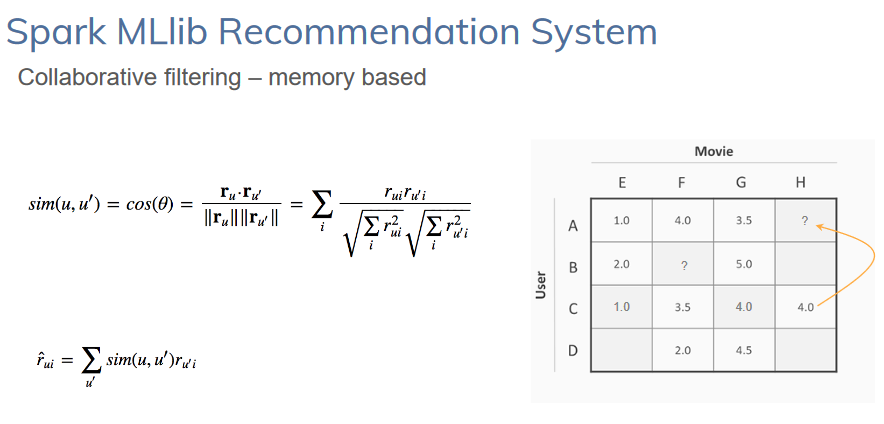

##### model based

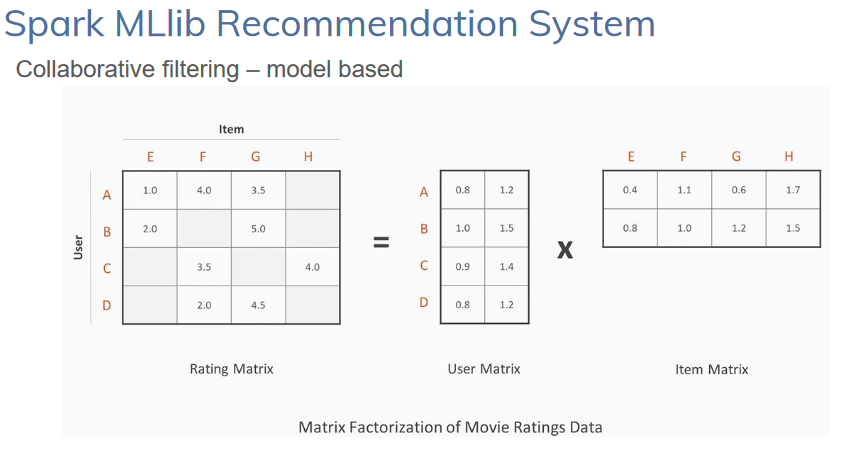

##### Altenating Least Squares

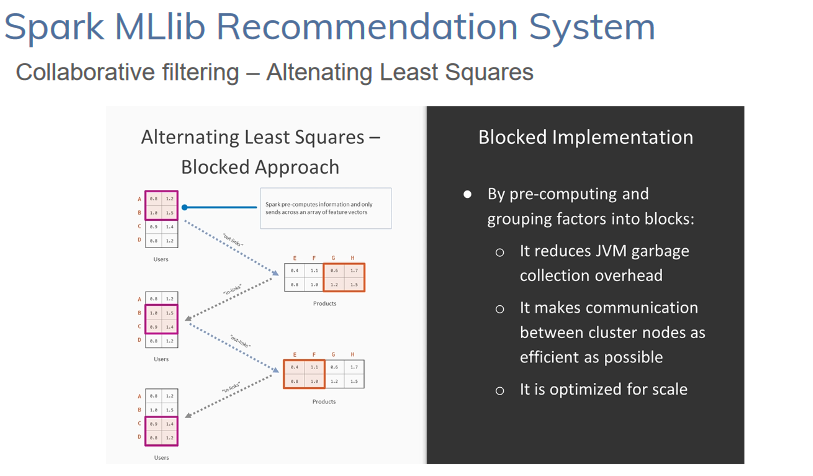

##### pyspark.ml

In [66]:
import numpy as np

from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pprint import pprint

spark = SparkSession.builder.appName('movieRecommendationPySpark').getOrCreate()

In [67]:
PATH = '/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 2 2021 - 2022/DS200.M21 - PHÂN TÍCH DỮ LIỆU LỚN/THỰC HÀNH/LAB/Lab SparkML - 28 04 2022/Slide 10 - PySpark dataset/'

In [68]:
ratings = (spark.read.csv(path=PATH+'ratings_small.csv', 
                         sep=',', header=True, quote='"', 
                         schema='userId INT, movieId INT, rating DOUBLE, timestamp INT',) \
                         #.withColumn('timestamp', f.to_timestamp(f.from_unixtime('timestamp_unix'))) \
                         .select('userId', 'movieId', 'rating').cache())

ratings.printSchema()
ratings.show()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|      1|   4.0|
|     1|      3|   4.0|
|     1|      6|   4.0|
|     1|     47|   5.0|
|     1|     50|   5.0|
|     1|     70|   3.0|
|     1|    101|   5.0|
|     1|    110|   4.0|
|     1|    151|   5.0|
|     1|    157|   5.0|
|     1|    163|   5.0|
|     1|    216|   5.0|
|     1|    223|   3.0|
|     1|    231|   5.0|
|     1|    235|   4.0|
|     1|    260|   5.0|
|     1|    296|   3.0|
|     1|    316|   3.0|
|     1|    333|   5.0|
|     1|    349|   4.0|
+------+-------+------+
only showing top 20 rows



In [69]:
ratings.summary().show()

+-------+------------------+----------------+------------------+
|summary|            userId|         movieId|            rating|
+-------+------------------+----------------+------------------+
|  count|            100836|          100836|            100836|
|   mean|326.12756356856676|19435.2957177992| 3.501556983616962|
| stddev| 182.6184914635004|35530.9871987003|1.0425292390606342|
|    min|                 1|               1|               0.5|
|    25%|               177|            1199|               3.0|
|    50%|               325|            2991|               3.5|
|    75%|               477|            8092|               4.0|
|    max|               610|          193609|               5.0|
+-------+------------------+----------------+------------------+



In [70]:
als = ALS(userCol='userId', itemCol='movieId', ratingCol='rating')

(training_data, validation_data) = ratings.randomSplit([8.0, 2.0])

evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')

model = als.fit(training_data)
predictions = model.transform(validation_data)

In [71]:
predictions.show()

+------+-------+------+----------+
|userId|movieId|rating|prediction|
+------+-------+------+----------+
|   191|    148|   5.0|       NaN|
|   385|    471|   4.0| 3.1194832|
|   218|    471|   4.0| 3.5703242|
|   500|    471|   1.0| 3.4591331|
|   216|    471|   3.0| 2.9185586|
|   541|    471|   3.0| 3.8962955|
|   599|    833|   1.5| 1.1013477|
|   609|    833|   3.0| 0.9064443|
|   492|    833|   4.0| 1.2179551|
|    20|   1088|   4.5| 3.6661148|
|   169|   1088|   4.5|  4.136183|
|   554|   1088|   5.0|  4.238141|
|    41|   1088|   1.5| 3.3271496|
|   563|   1088|   4.0| 3.3365254|
|   387|   1088|   1.5|  2.702577|
|   391|   1088|   1.0| 3.2779942|
|   104|   1088|   3.0| 3.4168363|
|   385|   1238|   3.0|  3.593553|
|   268|   1238|   5.0| 3.8582742|
|   387|   1342|   3.0| 2.7908237|
+------+-------+------+----------+
only showing top 20 rows



In [72]:
rmse = evaluator.evaluate(predictions.na.drop())
print(rmse)

0.8823633878819495


In [73]:
userFactors = model.userFactors
itemFactors = model.itemFactors

userFactors.sort('id').show(5, False)
itemFactors.sort('id').show(5, False)

user91Feature = model.userFactors.filter(f.col('id')==91).select(f.col('features')).rdd.flatMap(lambda x: x).collect()[0]
item471Feature = model.itemFactors.filter(f.col('id')==471).select(f.col('features')).rdd.flatMap(lambda x: x).collect()[0]

print(user91Feature)
print(item471Feature)
print('Predicted rating of user 91 for movie 471: ' + str(np.dot(user91Feature, item471Feature)))

+---+-----------------------------------------------------------------------------------------------------------------------------+
|id |features                                                                                                                     |
+---+-----------------------------------------------------------------------------------------------------------------------------+
|1  |[-0.7409151, -0.3887517, -0.09881519, -0.59661126, 0.6530133, -0.19814143, -1.4539269, -0.04477215, -1.0860482, 0.42825586]  |
|2  |[-0.587514, -0.7067634, -0.23384187, -0.21692672, 0.6834769, -0.2421887, -1.5223663, 0.0011398295, -0.19267265, -0.39549273] |
|3  |[0.29503277, -0.6626402, 0.15985425, -1.5991684, -0.42841265, -0.39211014, -0.66361016, 0.046138562, 0.53461194, -0.58740747]|
|4  |[-0.35782447, -0.17422721, 1.1291994, -0.16655003, 0.90345263, -0.3177274, -0.421986, -0.4252231, -1.3161756, 0.8625117]     |
|5  |[0.074353844, -0.19467258, 0.42222363, -0.12144969, 0.9336939, -0.5697,

In [74]:
parameter_grid = (ParamGridBuilder().addGrid(als.rank, [5, 10]).addGrid(als.maxIter, [20]).addGrid(als.regParam, [0.05, 0.1]).build())

In [75]:
type(parameter_grid)

list

In [76]:
pprint(parameter_grid)

[{Param(parent='ALS_490fb4bab8e8', name='maxIter', doc='max number of iterations (>= 0).'): 20,
  Param(parent='ALS_490fb4bab8e8', name='rank', doc='rank of the factorization'): 5,
  Param(parent='ALS_490fb4bab8e8', name='regParam', doc='regularization parameter (>= 0).'): 0.05},
 {Param(parent='ALS_490fb4bab8e8', name='maxIter', doc='max number of iterations (>= 0).'): 20,
  Param(parent='ALS_490fb4bab8e8', name='rank', doc='rank of the factorization'): 5,
  Param(parent='ALS_490fb4bab8e8', name='regParam', doc='regularization parameter (>= 0).'): 0.1},
 {Param(parent='ALS_490fb4bab8e8', name='maxIter', doc='max number of iterations (>= 0).'): 20,
  Param(parent='ALS_490fb4bab8e8', name='rank', doc='rank of the factorization'): 10,
  Param(parent='ALS_490fb4bab8e8', name='regParam', doc='regularization parameter (>= 0).'): 0.05},
 {Param(parent='ALS_490fb4bab8e8', name='maxIter', doc='max number of iterations (>= 0).'): 20,
  Param(parent='ALS_490fb4bab8e8', name='rank', doc='rank of 

In [77]:
crossvalidator = CrossValidator(estimator=als, estimatorParamMaps=parameter_grid, 
                                evaluator=evaluator, numFolds=4)

In [78]:
crossval_model = crossvalidator.fit(training_data)

In [79]:
predictions = crossval_model.transform(validation_data)

In [80]:
rmse = evaluator.evaluate(predictions.na.drop())
print(rmse)

0.919746958831752


In [81]:
model = crossval_model.bestModel

In [82]:
model.userFactors.show(5, False)

+---+--------------------------------------------------------------+
|id |features                                                      |
+---+--------------------------------------------------------------+
|10 |[-1.5246798, 0.30252948, -1.0289556, 1.1695187, -0.79579055]  |
|20 |[-0.19002794, -0.8987997, -1.8984011, -0.4373558, 0.027029313]|
|30 |[-0.8994708, 0.24439979, -1.7684937, 0.5020758, -0.65825325]  |
|40 |[0.34635276, -0.7369798, -1.8945789, 0.10690027, 0.37934968]  |
|50 |[0.29859948, -0.077665515, -1.3059419, -0.5631328, 0.11465419]|
+---+--------------------------------------------------------------+
only showing top 5 rows



In [83]:
predictions.toPandas()

,userId,movieId,rating,prediction
0,191,148,5.0,NaN
1,385,471,4.0,3.102510
2,218,471,4.0,3.783599
3,500,471,1.0,4.411137
4,216,471,3.0,3.898688
...,...,...,...,...
20275,298,79008,4.0,2.694047
20276,111,84374,2.5,3.131916
20277,448,146688,2.0,NaN
20278,210,147378,4.5,2.422547


In [84]:
# Top 5 Movies for each user, for all users
userID = 91

rec_all_users = model.recommendForAllUsers(5).cache()
rec_all_users.show(5, False)
rec_all_users.printSchema()

+------+-----------------------------------------------------------------------------------------------+
|userId|recommendations                                                                                |
+------+-----------------------------------------------------------------------------------------------+
|471   |[[158872, 5.921297], [3235, 5.7318325], [26258, 5.66692], [86320, 5.634759], [51931, 5.592551]]|
|463   |[[5034, 6.140465], [5485, 5.7708297], [5075, 5.709493], [183897, 5.33297], [3200, 5.3165464]]  |
|496   |[[170355, 5.186098], [3030, 5.054731], [1194, 5.0286217], [6380, 4.957958], [2936, 4.76931]]   |
|148   |[[1034, 5.8085318], [932, 5.5138655], [1866, 5.4756684], [3682, 5.228907], [1696, 5.200792]]   |
|540   |[[232, 5.985216], [8973, 5.8239913], [5034, 5.818137], [1177, 5.750943], [6201, 5.680675]]     |
+------+-----------------------------------------------------------------------------------------------+
only showing top 5 rows

root
 |-- userId: integer (nul

In [85]:
recommendation_for_user91 = rec_all_users.filter(f.col('userId')==userID) \
.withColumn('rec', f.explode('recommendations')).select('userId', f.col('rec').movieId.alias('movieId'),
                                                         f.col('rec').rating.alias('reting'))
recommendation_for_user91.show(truncate=False)

+------+-------+---------+
|userId|movieId|reting   |
+------+-------+---------+
|91    |6380   |6.088526 |
|91    |5075   |5.680013 |
|91    |3200   |5.4110036|
|91    |86377  |5.3995075|
|91    |7842   |5.3581767|
+------+-------+---------+



In [86]:
# Top unrated movies for a user
userID = 91

rateMovies = ratings.filter(f.col('userId')==userID).select('movieId').rdd.flatMap(lambda x: x).collect()
# movie which hasn't been rated by userID
movies_to_be_rated = ratings.filter(~ f.col('movieID').isin(rateMovies)).select('movieId').distinct().withColumn('userId', f.lit(userID))

In [87]:
movies_to_be_rated.sort('movieId').show(5)
user_movie_predictions = model.transform(movies_to_be_rated)
user_movie_predictions.filter(~f.isnan('prediction')).orderBy('prediction', ascending=False).show(5)

+-------+------+
|movieId|userId|
+-------+------+
|      4|    91|
|      5|    91|
|      7|    91|
|      8|    91|
|      9|    91|
+-------+------+
only showing top 5 rows

+-------+------+----------+
|movieId|userId|prediction|
+-------+------+----------+
|   6380|    91|  6.088526|
|   5075|    91|  5.680013|
|   3200|    91| 5.4110036|
|  86377|    91| 5.3995075|
|   7842|    91| 5.3581767|
+-------+------+----------+
only showing top 5 rows



### Spark MLlib NLP

[Dataset](https://drive.google.com/drive/folders/11dah8AyLOOY-kjpfJ8xd18axDKc-0JPf?usp=sharing)

##### Data exploration

In [88]:
import pandas as pd
import seaborn as sns

from IPython.core.display import display
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

sns.set()

spark = SparkSession.builder.getOrCreate()

schema = 'polarity FLOAT, id LONG, date_time STRING, query STRING, user STRING, text STRING'

###### Load data training & test

In [89]:
raw_training_data = (spark.read.csv(path=PATH+'training.1600000.processed.noemoticon.csv', 
                                    sep=',', header=False, quote='"',
                                    schema=schema).cache())

raw_training_data.printSchema()
raw_training_data.show(truncate=30)
print('Overall data count:', raw_training_data.count())
raw_training_data.summary().show()

root
 |-- polarity: float (nullable = true)
 |-- id: long (nullable = true)
 |-- date_time: string (nullable = true)
 |-- query: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)

+--------+----------+----------------------------+--------+---------------+------------------------------+
|polarity|        id|                   date_time|   query|           user|                          text|
+--------+----------+----------------------------+--------+---------------+------------------------------+
|     0.0|1467810369|Mon Apr 06 22:19:45 PDT 2009|NO_QUERY|_TheSpecialOne_|@switchfoot http://twitpic....|
|     0.0|1467810672|Mon Apr 06 22:19:49 PDT 2009|NO_QUERY|  scotthamilton|is upset that he can't upda...|
|     0.0|1467810917|Mon Apr 06 22:19:53 PDT 2009|NO_QUERY|       mattycus|@Kenichan I dived many time...|
|     0.0|1467811184|Mon Apr 06 22:19:57 PDT 2009|NO_QUERY|        ElleCTF|my whole body feels itchy a...|
|     0.0|1467811193|Mon

In [90]:
raw_test_data = (spark.read.csv(path=PATH+'testdata.manual.2009.06.14.csv', 
                                sep=',', header=False, quote='"', 
                                schema=schema).cache())

raw_test_data.printSchema()
raw_test_data.show(truncate=30)
print('Overall data count:', raw_test_data.count())
raw_test_data.summary().show()

root
 |-- polarity: float (nullable = true)
 |-- id: long (nullable = true)
 |-- date_time: string (nullable = true)
 |-- query: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)

+--------+---+----------------------------+-------+--------------+------------------------------+
|polarity| id|                   date_time|  query|          user|                          text|
+--------+---+----------------------------+-------+--------------+------------------------------+
|     4.0|  3|Mon May 11 03:17:40 UTC 2009|kindle2|        tpryan|@stellargirl I loooooooovvv...|
|     4.0|  4|Mon May 11 03:18:03 UTC 2009|kindle2|        vcu451|Reading my kindle2...  Love...|
|     4.0|  5|Mon May 11 03:18:54 UTC 2009|kindle2|        chadfu|Ok, first assesment of the ...|
|     4.0|  6|Mon May 11 03:19:04 UTC 2009|kindle2|         SIX15|@kenburbary You'll love you...|
|     4.0|  7|Mon May 11 03:21:41 UTC 2009|kindle2|      yamarama|@mikefish  Fair enoug

###### distribution of polarity

No of rows with Polarity: 498/498


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


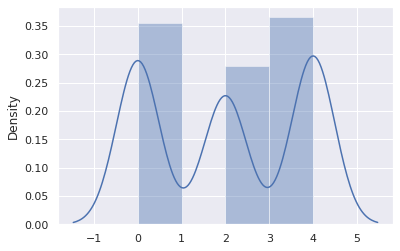

In [91]:
df = raw_test_data.select('polarity').na.drop()
print(f'No of rows with Polarity: {df.count()}/{raw_test_data.count()}')

sns.distplot(df.toPandas())

No of rows with Polarity: 1600000/1600000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


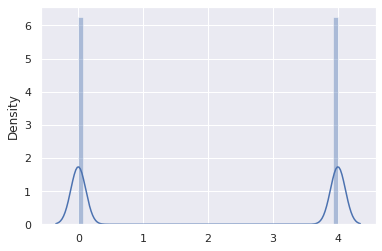

In [92]:
df = raw_training_data.select('polarity').na.drop()
print(f'No of rows with Polarity: {df.count()}/{raw_training_data.count()}')

sns.distplot(df.toPandas())

In [93]:
polarity_df = raw_training_data.select('polarity').cache()

polarity_df.groupBy('polarity').count().toPandas()

,polarity,count
0,4.0,800000
1,0.0,800000


###### Converting Date column

In [94]:
spark.sql('set spark.sql.legacy.timeParserPolicy=LEGACY')

schema_ddl = ' polarity STRING, id LONG, date_time TIMESTAMP, query STRING, user STRING, text STRING '
spark_reader = spark.read.schema(schema_ddl)

simple_date_format = 'EEE MMM dd HH:mm:ss zzz yyyy'

raw_data = spark_reader.csv(path=PATH+'training.1600000.processed.noemoticon.csv',
                            timestampFormat=simple_date_format)
raw_data.show(10)
raw_data.printSchema()
raw_data.summary().show()

+--------+----------+-------------------+--------+---------------+--------------------+
|polarity|        id|          date_time|   query|           user|                text|
+--------+----------+-------------------+--------+---------------+--------------------+
|       0|1467810369|2009-04-07 05:19:45|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|       0|1467810672|2009-04-07 05:19:49|NO_QUERY|  scotthamilton|is upset that he ...|
|       0|1467810917|2009-04-07 05:19:53|NO_QUERY|       mattycus|@Kenichan I dived...|
|       0|1467811184|2009-04-07 05:19:57|NO_QUERY|        ElleCTF|my whole body fee...|
|       0|1467811193|2009-04-07 05:19:57|NO_QUERY|         Karoli|@nationwideclass ...|
|       0|1467811372|2009-04-07 05:20:00|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|       0|1467811592|2009-04-07 05:20:03|NO_QUERY|        mybirch|         Need a hug |
|       0|1467811594|2009-04-07 05:20:03|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|       0|1467811795|2009-04-07 

###### Cleaning the tweet text

● Remove email-addresses and URLs

● Extract and then remove username (@mentions)

● Extract and then remove hastag (#hash-tag)

In [95]:
# extract up to 6 twitter user names/handles to the output column `users_mentioned`

user_regex = r'(@\w{1,15})'

raw_data.select(f.array_remove(f.array(f.regexp_extract(f.col('text'), user_regex, 1),
                                       f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,2)]), 2),
                                       f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,3)]), 3),
                                       f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,4)]), 4),
                                       f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,5)]), 5),
                                       f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,6)]), 6),),'',) \
                .alias('users_mentioned'), 'text').toPandas().head(35)

,users_mentioned,text
0,[@switchfoot],"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,[],is upset that he can't update his Facebook by ...
2,[@Kenichan],@Kenichan I dived many times for the ball. Man...
3,[],my whole body feels itchy and like its on fire
4,[@nationwideclass],"@nationwideclass no, it's not behaving at all...."
5,[@Kwesidei],@Kwesidei not the whole crew
6,[],Need a hug
7,[@LOLTrish],@LOLTrish hey long time no see! Yes.. Rains a...
8,[@Tatiana_K],@Tatiana_K nope they didn't have it
9,[@twittera],@twittera que me muera ?


In [96]:
raw_data.select(f.regexp_replace(f.col('text'), user_regex, '').alias('text'),
                f.col('text').alias('original_text'), ).toPandas().head(20)

,text,original_text
0,"http://twitpic.com/2y1zl - Awww, that's a bum...","@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,I dived many times for the ball. Managed to s...,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am...","@nationwideclass no, it's not behaving at all...."
5,not the whole crew,@Kwesidei not the whole crew
6,Need a hug,Need a hug
7,"hey long time no see! Yes.. Rains a bit ,onl...",@LOLTrish hey long time no see! Yes.. Rains a...
8,nope they didn't have it,@Tatiana_K nope they didn't have it
9,que me muera ?,@twittera que me muera ?


In [97]:
hashtag_replace_regex = '(#\w{1,})'
raw_data.select(f.array_remove(f.array(f.regexp_extract(f.col('text'), hashtag_replace_regex, 1),
                                       f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,2)]), 2),
                                       f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,3)]), 3),
                                       f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,4)]), 4),
                                       f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,5)]), 5),
                                       f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,6)]), 6),),'',) \
                .alias('hashtags'), 'text').show(100, truncate=False)


+--------+------------------------------------------------------------------------------------------------------------------------------------------+
|hashtags|text                                                                                                                                      |
+--------+------------------------------------------------------------------------------------------------------------------------------------------+
|[]      |@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D                       |
|[]      |is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!                           |
|[]      |@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds                                                 |
|[]      |my whole body feels itchy and like its on fire                                            

In [98]:
url_regex = r'((https?|ftp|file):\/{2,3})+([-\w+&@#/%=~|$?!:,.]*)|(www.)+([-\w+&@#/%=~|$?!:,.]*)'
email_regex = r'[\w.-]+@[\w.-]+\.[a-zA-Z]{1,}'

raw_data.select(f.regexp_replace(f.col('text'), email_regex, '').alias('text_no_email'),
                f.regexp_replace(f.col('text'), url_regex, '').alias('text_no_url'),
                f.col('text').alias('original_text'), ).toPandas().head(20)

,text_no_email,text_no_url,original_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",@switchfoot - A that's a bummer. You shoulda...,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
5,@Kwesidei not the whole crew,@Kwesidei not the whole crew,@Kwesidei not the whole crew
6,Need a hug,Need a hug,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,@LOLTrish hey long time no see! Yes.. Rains a...,@LOLTrish hey long time no see! Yes.. Rains a...
8,@Tatiana_K nope they didn't have it,@Tatiana_K nope they didn't have it,@Tatiana_K nope they didn't have it
9,@twittera que me muera ?,@twittera que me muera ?,@twittera que me muera ?


In [99]:
from pyspark.sql.functions import udf
import html

@udf
def html_unescape(s: str):
  return html.unescape(s)

raw_data.select(html_unescape('text')).show(35, 100)

+----------------------------------------------------------------------------------------------------+
|                                                                                 html_unescape(text)|
+----------------------------------------------------------------------------------------------------+
|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Thir...|
|is upset that he can't update his Facebook by texting it... and might cry as a result  School tod...|
|           @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds|
|                                                     my whole body feels itchy and like its on fire |
|@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you al...|
|                                                                       @Kwesidei not the whole crew |
|                                                                        

In [100]:
def cleaning_process(data):
  user_regex = r'(@\w{1,15})'
  hashtag_replace_regex = '(#\w{1,})'
  data_new = data.withColumn('users_mentioned', (f.array_remove(f.array(f.regexp_extract(f.col('text'), user_regex, 1),
                                                                        f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,2)]), 2),
                                                                        f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,3)]), 3),
                                                                        f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,4)]), 4),
                                                                        f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,5)]), 5),
                                                                        f.regexp_extract(f.col('text'), ''.join([f'{user_regex}.*?' for i in range(0,6)]), 6),),'',))) \
                  .withColumn('hashtags', f.array_remove(f.array(f.regexp_extract(f.col('text'), hashtag_replace_regex, 1),
                                                                 f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,2)]), 2),
                                                                 f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,3)]), 3),
                                                                 f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,4)]), 4),
                                                                 f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,5)]), 5),
                                                                 f.regexp_extract(f.col('text'), ''.join([f'{hashtag_replace_regex}.*?' for i in range(0,6)]), 6),),'',))
                    
  return data_new

In [101]:
raw_data_training = spark.read.schema(schema).csv(path=PATH+'training.1600000.processed.noemoticon.csv')
clean_data_training = cleaning_process(raw_data_training)
clean_data_training.show()
clean_data_training.select('text').show(50, False)

+--------+----------+--------------------+--------+---------------+--------------------+--------------------+--------+
|polarity|        id|           date_time|   query|           user|                text|     users_mentioned|hashtags|
+--------+----------+--------------------+--------+---------------+--------------------+--------------------+--------+
|     0.0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|       [@switchfoot]|      []|
|     0.0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|                  []|      []|
|     0.0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|         [@Kenichan]|      []|
|     0.0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|                  []|      []|
|     0.0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|  [@nationwideclass]|      []|
|     0.0|1467811372|Mon Apr 06 22:20:...|NO_QUE

In [102]:
raw_data_test = spark.read.schema(schema).csv(path=PATH+'testdata.manual.2009.06.14.csv')
clean_data_test = cleaning_process(raw_data_test)
clean_data_test.show()
clean_data_test.select('text').show(50, False)

+--------+---+--------------------+-------+--------------+--------------------+----------------+----------+
|polarity| id|           date_time|  query|          user|                text| users_mentioned|  hashtags|
+--------+---+--------------------+-------+--------------+--------------------+----------------+----------+
|     4.0|  3|Mon May 11 03:17:...|kindle2|        tpryan|@stellargirl I lo...|  [@stellargirl]|        []|
|     4.0|  4|Mon May 11 03:18:...|kindle2|        vcu451|Reading my kindle...|              []|        []|
|     4.0|  5|Mon May 11 03:18:...|kindle2|        chadfu|Ok, first assesme...|              []|[#kindle2]|
|     4.0|  6|Mon May 11 03:19:...|kindle2|         SIX15|@kenburbary You'l...|   [@kenburbary]|        []|
|     4.0|  7|Mon May 11 03:21:...|kindle2|      yamarama|@mikefish  Fair e...|     [@mikefish]|        []|
|     4.0|  8|Mon May 11 03:22:...|kindle2|  GeorgeVHulme|@richardebaker no...|[@richardebaker]|        []|
|     0.0|  9|Mon May 11 03:

In [103]:
print(raw_data_training.count())
print(raw_data_test.count())

1600000
498


In [104]:
print(clean_data_training.count())
print(clean_data_test.count())

1600000
498


In [105]:
clean_data_training.filter("text == ''").show(1000)
clean_data_test.filter("text == ''").show(1000)

+--------+---+---------+-----+----+----+---------------+--------+
|polarity| id|date_time|query|user|text|users_mentioned|hashtags|
+--------+---+---------+-----+----+----+---------------+--------+
+--------+---+---------+-----+----+----+---------------+--------+

+--------+---+---------+-----+----+----+---------------+--------+
|polarity| id|date_time|query|user|text|users_mentioned|hashtags|
+--------+---+---------+-----+----+----+---------------+--------+
+--------+---+---------+-----+----+----+---------------+--------+



In [106]:
df_training = (
    clean_data_training
    # Remove all numbers
    .withColumn("text", f.regexp_replace(f.col("text"), "[^a-zA-Z]", " "))
    # Remove all double/multiple spaces
    .withColumn("text", f.regexp_replace(f.col("text"), " +", " "))
    # Remove leading and training whitespaces
    .withColumn("text", f.trim(f.col("text")))
    # Ensure we don't end up with empty rows
    .filter("text != ' '"))
data_training = df_training.select("text", "polarity").coalesce(3).cache()

In [107]:
df_test = (
    clean_data_test
    # Remove all numbers
    .withColumn('text', f.regexp_replace(f.col('text'), '[^a-zA-Z]', ' '))
    # Remove all double/multiple spaces
    .withColumn('text', f.regexp_replace(f.col('text'), ' +', ' '))
    # Remove leading and test whitespaces
    .withColumn('text', f.trim(f.col('text')))
    # Ensure we don't end up with empty rows
    .filter("text != ' '"))
data_test = df_test.select('text', 'polarity').coalesce(3).cache()

In [108]:
print(clean_data_training.count())
print(data_training.count())

1600000
1600000


In [109]:
print(clean_data_test.count())
print(data_test.count())

498
498


In [110]:
# df_training.toPandas()

In [111]:
df_test.toPandas()

,polarity,id,date_time,query,user,text,users_mentioned,hashtags
0,4.0,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,stellargirl I loooooooovvvvvveee my Kindle Not...,[@stellargirl],[]
1,4.0,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle Love it Lee childs is good read,[],[]
2,4.0,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,Ok first assesment of the kindle it fucking rocks,[],[#kindle2]
3,4.0,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,kenburbary You ll love your Kindle I ve had mi...,[@kenburbary],[]
4,4.0,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,mikefish Fair enough But i have the Kindle and...,[@mikefish],[]
...,...,...,...,...,...,...,...,...
493,2.0,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming LaTeX or InDesign submitted by...,[],[]
494,0.0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,On that note I hate Word I hate Pages I hate L...,[],[]
495,4.0,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh back in a real text editing environment I...,[],[]
496,0.0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,Trouble in Iran I see Hmm Iran Iran so far awa...,[],[#flockofseagullsweregeopoliticallycorrect]


###### Building model

In [112]:
(training_data, validation_data) = data_training.randomSplit([0.99, 0.01], seed=2022)

In [113]:
training_data.count()

1583873

In [114]:
validation_data.count()

16127

In [115]:
%%time
from pyspark.ml.feature import StopWordsRemover, Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

CPU times: user 105 µs, sys: 10 µs, total: 115 µs
Wall time: 123 µs


In [116]:
tokenizer = Tokenizer(inputCol='text', outputCol='words1')

stopwords_remover = StopWordsRemover(inputCol='words1', 
                                     outputCol='words2',
                                     stopWords=StopWordsRemover.loadDefaultStopWords('english'))

hashing_tf = HashingTF(inputCol='words2', outputCol='term_frequency')

idf = IDF(inputCol='term_frequency', outputCol='features', minDocFreq=5)

lr = LogisticRegression(labelCol='polarity')

semantic_analysis_pipeline = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf, lr])

In [117]:
df1 = tokenizer.transform(validation_data)
df1.show()

+--------------------+--------+--------------------+
|                text|polarity|              words1|
+--------------------+--------+--------------------+
|A big glass of Tr...|     0.0|[a, big, glass, o...|
|A bit worried tha...|     0.0|[a, bit, worried,...|
|A great hard trai...|     0.0|[a, great, hard, ...|
|A guy came to fix...|     0.0|[a, guy, came, to...|
|A lil baby bird f...|     0.0|[a, lil, baby, bi...|
|A little worried ...|     0.0|[a, little, worri...|
|A moment of silen...|     0.0|[a, moment, of, s...|
|A rainy day amp a...|     0.0|[a, rainy, day, a...|
|A tree fell down ...|     0.0|[a, tree, fell, d...|
|A wild pitch Come...|     0.0|[a, wild, pitch, ...|
|ACMcWhale I alway...|     0.0|[acmcwhale, i, al...|
|AFmonkey I think ...|     0.0|[afmonkey, i, thi...|
|AHHHHH i got hicc...|     0.0|[ahhhhh, i, got, ...|
|AIR BERLIN s city...|     0.0|[air, berlin, s, ...|
|AK Tina Murphy I ...|     0.0|[ak, tina, murphy...|
|ALLIEINCREDIBLE m...|     0.0|[allieincredibl

In [118]:
df2 = stopwords_remover.transform(df1)
df2.show()

+--------------------+--------+--------------------+--------------------+
|                text|polarity|              words1|              words2|
+--------------------+--------+--------------------+--------------------+
|A big glass of Tr...|     0.0|[a, big, glass, o...|[big, glass, trop...|
|A bit worried tha...|     0.0|[a, bit, worried,...|[bit, worried, am...|
|A great hard trai...|     0.0|[a, great, hard, ...|[great, hard, tra...|
|A guy came to fix...|     0.0|[a, guy, came, to...|[guy, came, fix, ...|
|A lil baby bird f...|     0.0|[a, lil, baby, bi...|[lil, baby, bird,...|
|A little worried ...|     0.0|[a, little, worri...|[little, worried,...|
|A moment of silen...|     0.0|[a, moment, of, s...|[moment, silence,...|
|A rainy day amp a...|     0.0|[a, rainy, day, a...|[rainy, day, amp,...|
|A tree fell down ...|     0.0|[a, tree, fell, d...|[tree, fell, outs...|
|A wild pitch Come...|     0.0|[a, wild, pitch, ...|[wild, pitch, com...|
|ACMcWhale I alway...|     0.0|[acmcwh

In [119]:
df3 = hashing_tf.transform(df2)
df3.show()

+--------------------+--------+--------------------+--------------------+--------------------+
|                text|polarity|              words1|              words2|      term_frequency|
+--------------------+--------+--------------------+--------------------+--------------------+
|A big glass of Tr...|     0.0|[a, big, glass, o...|[big, glass, trop...|(262144,[17532,22...|
|A bit worried tha...|     0.0|[a, bit, worried,...|[bit, worried, am...|(262144,[4214,178...|
|A great hard trai...|     0.0|[a, great, hard, ...|[great, hard, tra...|(262144,[2437,392...|
|A guy came to fix...|     0.0|[a, guy, came, to...|[guy, came, fix, ...|(262144,[8804,315...|
|A lil baby bird f...|     0.0|[a, lil, baby, bi...|[lil, baby, bird,...|(262144,[52800,64...|
|A little worried ...|     0.0|[a, little, worri...|[little, worried,...|(262144,[31536,57...|
|A moment of silen...|     0.0|[a, moment, of, s...|[moment, silence,...|(262144,[62257,71...|
|A rainy day amp a...|     0.0|[a, rainy, day, a..

In [120]:
df4 = idf.fit(df3).transform(df3)
df4.show()

+--------------------+--------+--------------------+--------------------+--------------------+--------------------+
|                text|polarity|              words1|              words2|      term_frequency|            features|
+--------------------+--------+--------------------+--------------------+--------------------+--------------------+
|A big glass of Tr...|     0.0|[a, big, glass, o...|[big, glass, trop...|(262144,[17532,22...|(262144,[17532,22...|
|A bit worried tha...|     0.0|[a, bit, worried,...|[bit, worried, am...|(262144,[4214,178...|(262144,[4214,178...|
|A great hard trai...|     0.0|[a, great, hard, ...|[great, hard, tra...|(262144,[2437,392...|(262144,[2437,392...|
|A guy came to fix...|     0.0|[a, guy, came, to...|[guy, came, fix, ...|(262144,[8804,315...|(262144,[8804,315...|
|A lil baby bird f...|     0.0|[a, lil, baby, bi...|[lil, baby, bird,...|(262144,[52800,64...|(262144,[52800,64...|
|A little worried ...|     0.0|[a, little, worri...|[little, worried,...

In [121]:
lr.fit(df4).transform(df4).show()

+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|                text|polarity|              words1|              words2|      term_frequency|            features|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|A big glass of Tr...|     0.0|[a, big, glass, o...|[big, glass, trop...|(262144,[17532,22...|(262144,[17532,22...|[13.5941237664655...|[0.54050361336036...|       0.0|
|A bit worried tha...|     0.0|[a, bit, worried,...|[bit, worried, am...|(262144,[4214,178...|(262144,[4214,178...|[12.2955902803380...|[0.65690830401876...|       0.0|
|A great hard trai...|     0.0|[a, great, hard, ...|[great, hard, tra...|(262144,[2437,392...|(262144,[2437,392...|[10.9144617522036...|[0.11529777120135..

In [122]:
semantic_analysis_model = semantic_analysis_pipeline.fit(training_data)

In [123]:
spark = SparkSession.builder.appName('ModelTraining').config('spark.executor.memory', '4g').getOrCreate()

In [124]:
%%time
trained_df = semantic_analysis_model.transform(training_data)
val_df = semantic_analysis_model.transform(validation_data)
test_df = semantic_analysis_model.transform(data_test)

CPU times: user 158 ms, sys: 27.1 ms, total: 185 ms
Wall time: 585 ms


In [125]:
trained_df.show()
val_df.show()
test_df.show()

+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|                text|polarity|              words1|              words2|      term_frequency|            features|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|A B B and a P Mus...|     0.0|[a, b, b, and, a,...|[b, b, p, mustang...|(262144,[17893,29...|(262144,[17893,29...|[11.0551148716274...|[0.99693338110503...|       0.0|
|A B C D A I GI Q ...|     0.0|[a, b, c, d, a, i...|[b, c, d, gi, q, ...|(262144,[31015,69...|(262144,[31015,69...|[8.18539506407642...|[0.51178584850457...|       0.0|
|A BEAUTIFUL morni...|     0.0|[a, beautiful, mo...|[beautiful, morni...|(262144,[2895,538...|(262144,[2895,538...|[8.31222451073983...|[0.57301822085700..

In [126]:
%%time
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol='polarity', metricName='accuracy')
accuracy_val = evaluator.evaluate(val_df)
accuracy_test = evaluator.evaluate(test_df)

print('='*15+'Validation Data'+'='*15)
print(f'Accuracy: {accuracy_val*100:.5f}%')
print('='*15+'Test Data'+'='*15)
print(f'Accuracy: {accuracy_test*100:.5f}%')

===============Validation Data===============
Accuracy: 76.98890%
===============Test Data===============
Accuracy: 58.23293%
CPU times: user 178 ms, sys: 22.9 ms, total: 201 ms
Wall time: 21.3 s


In [127]:
# final_model = semantic_analysis_pipeline.fit(data_training)
# final_model.save(PATH)

## Tài Liệu Tham Khảo
- [pyspark.ml package](https://spark.apache.org/docs/3.0.1/api/python/pyspark.ml.html#module-pyspark.ml.linalg)
- [Data Types - RDD-based API](https://spark.apache.org/docs/latest/mllib-data-types.html)
- [Data sources](https://spark.apache.org/docs/latest/ml-datasource#data-sources)
- [Apache Spark](https://github.com/apache/spark/tree/v3.0.1)
- [Machine Learning Library (MLlib) Guide](https://spark.apache.org/docs/3.0.1/ml-guide.html)
- [MLlib (DataFrame-based)](https://spark.apache.org/docs/latest/api/python/reference/pyspark.ml.html)
